Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

Linear least squares with l2 regularization. Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

A hyperparameter is used called “lambda” (in sklearn alpha) that controls the weighting of the penalty to the loss function. A default value of 1.0 will fully weight the penalty; a value of 0 excludes the penalty. Very small values of lambda, such as 1e-3 or smaller are common.

ridge_loss = loss + (lambda * l2_penalty)

# 0. Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler # scaling data to 0-1 range
from sklearn.model_selection import train_test_split #train/test split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [27]:
random_state = 42

# 1. Load data

In [2]:
filename = ("./1_Input/housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
print(dataset.shape)
dataset.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 2. Model

In [6]:
# Initialize model
model = Ridge(alpha=1.0)

### Split data

In [7]:
# Split data into X and y
X = dataset.drop(columns= ['MEDV'])
y = dataset['MEDV']

### Scale data

In [10]:
# Initialize min/max scaler: this takes data to a 0 to 1 scale
scaler = MinMaxScaler()

In [11]:
scaled_X = scaler.fit_transform(X)

### Test/train split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=random_state)


In [13]:
# Fit model
model.fit(X_train, y_train)

Ridge()

### Accuracy

In [15]:
score_train = model.score(X_train, y_train)
score_train # r2

0.7384711025589722

In [16]:
score = model.score(X_test, y_test)
score # r2

0.7110583237139554

### Variable importance plot

Feature: 0, Score: -7.47683
Feature: 1, Score: 2.51283
Feature: 2, Score: 0.12194
Feature: 3, Score: 3.55524
Feature: 4, Score: -5.52563
Feature: 5, Score: 19.02081
Feature: 6, Score: -0.89352
Feature: 7, Score: -11.54595
Feature: 8, Score: 3.80517
Feature: 9, Score: -3.37867
Feature: 10, Score: -8.31494
Feature: 11, Score: 4.45931
Feature: 12, Score: -19.10043


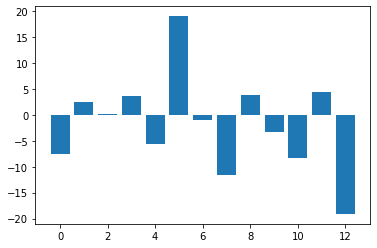

In [21]:
# Get importance
importance = model.coef_
# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Since variables are scaled, values are comparable

In [ ]:
# improve with parameter tuning? 

In [25]:
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_reg = Ridge()
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'lsqr'}

In [29]:
Ridgeregression = Ridge(random_state=random_state, **Ridge_GS.best_params_)
all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
all_accuracies

array([0.73490581, 0.57893501, 0.73522382, 0.76835741, 0.65034787])

Sources of information: 
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- https://machinelearningmastery.com/ridge-regression-with-python/
- Feature importance: https://machinelearningmastery.com/calculate-feature-importance-with-python/